In [ ]:
pip install git+https://github.com/billybraith17/billiespnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/billybraith17/billiespnet to /tmp/pip-req-build-t8e3zx09
  Running command git clone -q https://github.com/billybraith17/billiespnet /tmp/pip-req-build-t8e3zx09
  Running command git submodule update --init --recursive -q
     |████████████████████████████████| 86 kB 3.2 MB/s 
     |████████████████████████████████| 1.3 MB 31.7 MB/s 
     |████████████████████████████████| 73 kB 2.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 212 kB 93.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.3 MB 68.9 MB/s 
     |████████████████████████████████| 235 kB 98.7 MB/s 
     |████████████████████████████████| 3.1 MB 87.9 MB

In [ ]:
pip install torch espnet espnet_model_zoo parallel_wavegan==0.5.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 68 kB 3.8 MB/s 
     |████████████████████████████████| 125 kB 10.5 MB/s 
     |████████████████████████████████| 120 kB 56.1 MB/s 
  Created wheel for parallel-wavegan: filename=parallel_wavegan-0.5.4-py3-none-any.whl size=71010 sha256=c6a15d2a350dd3e6312c35e4b3b52fba512a7f734f8f46681ce17afc329682e2
  Stored in directory: /root/.cache/pip/wheels/5e/76/4d/8d938995675ca8cc9352214c9f23c57a505fe3bcd46ce3b138
Successfully built parallel-wavegan


In [ ]:
%%bash
!(stat -t /usr/local/lib/*/dist-packages/google/colab > /dev/null 2>&1) && exit
pip install ninja 2>> install.log
git clone https://github.com/SIDN-IAP/global-model-repr.git tutorial_code 2>> install.log
# git clone https://github.com/billybraith17/global-model-repr.git tutorial_code 2>> install.log

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
try: # set up path
    import google.colab, sys, torch
    sys.path.append('/content/tutorial_code')
    if not torch.cuda.is_available():
        print("Change runtime type to include a GPU.")
except:
    pass

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

In [ ]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Running pytorch', torch.__version__, 'using', device.type)

Running pytorch 1.12.1+cu113 using cuda


In [ ]:
import torchvision
import torch.hub

# using the global-model-repr package
from netdissect import nethook, proggan

In [ ]:
# def from_pretrained2(
#     model_tag: Optional[str] = None,
#     vocoder_tag: Optional[str] = None,
#     **kwargs: Optional[Any],
# ):
"""Build Text2Speech instance from the pretrained model.
Args:
    model_tag (Optional[str]): Model tag of the pretrained models.
        Currently, the tags of espnet_model_zoo are supported.
    vocoder_tag (Optional[str]): Vocoder tag of the pretrained vocoders.
        Currently, the tags of parallel_wavegan are supported, which should
        start with the prefix "parallel_wavegan/".
Returns:
    Text2Speech: Text2Speech instance.
"""

from espnet2.bin.tts_inference import Text2Speech

model_tag = 'kan-bayashi/vctk_xvector_conformer_fastspeech2' #@param ["kan-bayashi/vctk_gst_tacotron2", "kan-bayashi/vctk_gst_transformer", "kan-bayashi/vctk_xvector_tacotron2", "kan-bayashi/vctk_xvector_transformer", "kan-bayashi/vctk_xvector_conformer_fastspeech2", "kan-bayashi/vctk_gst+xvector_tacotron2", "kan-bayashi/vctk_gst+xvector_transformer", "kan-bayashi/vctk_gst+xvector_conformer_fastspeech2", "kan-bayashi/vctk_multi_spk_vits", "kan-bayashi/vctk_full_band_multi_spk_vits", "kan-bayashi/libritts_xvector_transformer", "kan-bayashi/libritts_xvector_conformer_fastspeech2", "kan-bayashi/libritts_gst+xvector_transformer", "kan-bayashi/libritts_gst+xvector_conformer_fastspeech2", "kan-bayashi/libritts_xvector_vits"] {type:"string"}
vocoder_tag = "parallel_wavegan/vctk_hifigan.v1"  #@param ["none", "parallel_wavegan/vctk_parallel_wavegan.v1.long", "parallel_wavegan/vctk_multi_band_melgan.v2", "parallel_wavegan/vctk_style_melgan.v1", "parallel_wavegan/vctk_hifigan.v1", "parallel_wavegan/libritts_parallel_wavegan.v1.long", "parallel_wavegan/libritts_multi_band_melgan.v2", "parallel_wavegan/libritts_hifigan.v1", "parallel_wavegan/libritts_style_melgan.v1"] {type:"string"}
kwargs = {
    # Only for Tacotron 2 & Transformer
    "threshold" : 0.5,
    # Only for Tacotron 2
    "minlenratio" : 0.0,
    "maxlenratio" : 10.0,
    "use_att_constraint" : False,
    "backward_window" : 1,
    "forward_window" : 3,
    # Only for FastSpeech & FastSpeech2 & VITS
    "speed_control_alpha" : 1.0,
    # Only for VITS
    "noise_scale" : 0.333,
    "noise_scale_dur" : 0.333,
}

# print(kwargs["noise_scale"])
# model_tag: Optional[str] = None
# vocoder_tag: Optional[str] = None
# **kwargs: Optional[Any]


if model_tag is not None:
    try:
        from espnet_model_zoo.downloader import ModelDownloader

    except ImportError:
        logging.error(
            "`espnet_model_zoo` is not installed. "
            "Please install via `pip install -U espnet_model_zoo`."
        )
        raise
    d = ModelDownloader()
    kwargs.update(**d.download_and_unpack(model_tag))

if vocoder_tag is not None:
    if vocoder_tag.startswith("parallel_wavegan/"):
        try:
            from parallel_wavegan.utils import download_pretrained_model

        except ImportError:
            logging.error(
                "`parallel_wavegan` is not installed. "
                "Please install via `pip install -U parallel_wavegan`."
            )
            raise

        from parallel_wavegan import __version__
        from packaging.version import parse as V
        from pathlib import Path

        # NOTE(kan-bayashi): Filelock download is supported from 0.5.2
        assert V(__version__) > V("0.5.1"), (
            "Please install the latest parallel_wavegan "
            "via `pip install -U parallel_wavegan`."
        )
        vocoder_tag = vocoder_tag.replace("parallel_wavegan/", "")
        vocoder_file = download_pretrained_model(vocoder_tag)
        vocoder_config = Path(vocoder_file).parent / "config.yml"
        kwargs.update(vocoder_config=vocoder_config, vocoder_file=vocoder_file)

    else:
        raise ValueError(f"{vocoder_tag} is unsupported format.")

# __init__
text2speech = Text2Speech(**kwargs)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Unzipping corpora/cmudict.zip.
https://zenodo.org/record/4394602/files/tts_train_xvector_conformer_fastspeech2_transformer_teacher_raw_phn_tacotron_g2p_en_no_space_train.loss.ave.zip?download=1: 100%|██████████| 270M/270M [00:48<00:00, 5.82MB/s]
Downloading...
From: https://drive.google.com/uc?id=1oVOC4Vf0DYLdDp4r7GChfgj7Xh5xd0ex
To: /root/.cache/parallel_wavegan/vctk_hifigan.v1.tar.gz
100%|██████████| 916M/916M [00:13<00:00, 69.7MB/s]


In [ ]:
# Wrap the vocoder
from netdissect import nethook
layer = 'vocoder.blocks.6.convs1.1.0'    #@param ['vocoder.blocks.6.convs1.1.0', "vocoder.blocks.5.convs2.0.0", "vocoder.blocks.1.convs1.2.0", "vocoder.last_conv_layers.0", "vocoder.last_conv_layers.1", "vocoder.last_conv_layers.2", "vocoder.last_conv_layers.3", "vocoder.conv_layers.6.conv", "vocoder.conv_layers.6.conv1x1_aux", "vocoder.conv_layers.6.conv1x1_out", "vocoder.conv_layers.6.conv1x1_skip", "vocoder.first_conv", "vocoder.upsample_net.conv_in", "vocoder.upsample_net.upsample.up_layers.6", "vocoder.upsample_net.upsample.up_layers.7", "vocoder.melgan.0", "vocoder.melgan.19.stack.4", "vocoder.melgan.23", "vocoder.pqmf.pad_fn", "vocoder.blocks.7.upsample", "vocoder.output_conv.1", "vocoder.blocks.11.convs2.0.1", "vocoder.output_conv.2", "vocoder.blocks.0.convs1.1.1", "vocoder.blocks.1.convs1.1.1", "vocoder.blocks.4.convs1.1.1", "vocoder.blocks.7.convs1.1.1", "vocoder.blocks.7.convs1.2.1", "vocoder.blocks.8.convs1.2.1", "vocoder.blocks.9.convs1.1.1", "vocoder.blocks.9.convs2.1.1",  "vocoder.blocks.10.convs1.1.1",  "vocoder.blocks.10.convs2.1.1", "vocoder.blocks.11.convs2.1.1", "vocoder.blocks.0.convs1.1.0", "vocoder.blocks.1.convs1.1.0", "vocoder.blocks.4.convs1.1.0", "vocoder.blocks.7.convs1.1.0", "vocoder.blocks.7.convs1.2.0", "vocoder.blocks.8.convs1.2.0", "vocoder.blocks.9.convs1.1.0", "vocoder.blocks.9.convs2.1.0",  "vocoder.blocks.10.convs1.1.0",  "vocoder.blocks.10.convs2.1.0", "vocoder.blocks.11.convs2.1.0"] {type:"string"}


# Don't re-wrap it, if it's already wrapped (e.g., if you press enter twice)
if not isinstance(text2speech.vocoder, nethook.InstrumentedModel):
    text2speech.vocoder = nethook.InstrumentedModel(text2speech.vocoder)
text2speech.vocoder.retain_layer(layer)

In [ ]:
text2speech.vocoder

# text2speech.vocoder.retain_layer('vocoder')

InstrumentedModel(
  (model): ParallelWaveGANPretrainedVocoder(
    (vocoder): HiFiGANGenerator(
      (input_conv): Conv1d(80, 512, kernel_size=(7,), stride=(1,), padding=(3,))
      (upsamples): ModuleList(
        (0): Sequential(
          (0): LeakyReLU(negative_slope=0.1)
          (1): ConvTranspose1d(512, 256, kernel_size=(10,), stride=(5,), padding=(3,), output_padding=(1,))
        )
        (1): Sequential(
          (0): LeakyReLU(negative_slope=0.1)
          (1): ConvTranspose1d(256, 128, kernel_size=(10,), stride=(5,), padding=(3,), output_padding=(1,))
        )
        (2): Sequential(
          (0): LeakyReLU(negative_slope=0.1)
          (1): ConvTranspose1d(128, 64, kernel_size=(8,), stride=(4,), padding=(2,))
        )
        (3): Sequential(
          (0): LeakyReLU(negative_slope=0.1)
          (1): ConvTranspose1d(64, 32, kernel_size=(6,), stride=(3,), padding=(2,), output_padding=(1,))
        )
      )
      (blocks): ModuleList(
        (0): HiFiGANResidualB

In [ ]:
import glob
import os
import numpy as np
import kaldiio

# Get model directory path
from espnet_model_zoo.downloader import ModelDownloader
d = ModelDownloader()
model_dir = os.path.dirname(d.download_and_unpack(model_tag)["train_config"])

# X-vector selection
# We only need the x-vector part at that's what this model uses. The ones with
spembs = None
if text2speech.use_spembs:
  xvector_ark = [p for p in glob.glob(f"{model_dir}/../../dump/**/spk_xvector.ark", recursive=True) if "tr" in p][0]
  xvectors = {k: v for k, v in kaldiio.load_ark(xvector_ark)}
  spks = list(xvectors.keys())

In [ ]:
from netdissect import tally
x = "Please call Stella. Ask her too."

# To collect stats, define a function that returns 2d [samples, units]
def compute_samples(index):
    # print(index)
    spk = spks[int(index[0])]
    spembs = xvectors[spk]
    wav = text2speech(x, spembs=spembs)["wav"]
    acts = text2speech.vocoder.retained_layer(layer)
    acts = torch.flatten(acts, start_dim=1)
    acts_stack = acts
    # print(acts.shape)
    # print(acts)
    # acts_stack = acts[0]

    for i in index[1:]:
      spk = spks[int(i)]
      spembs = xvectors[spk]
      wav = text2speech(x, spembs=spembs)["wav"]
      # acts = model.retained_layer('layer4') # get the activations, and flatten
      acts = text2speech.vocoder.retained_layer(layer)
      # print(acts[0].shape)
      # print(acts)
      acts = torch.flatten(acts, start_dim=1)

      acts_stack = torch.cat((acts_stack, acts), 0)
      # print(acts_stack.shape)
    return acts_stack


from torch.utils.data import TensorDataset
# Define our batch of inputs to the model
# zds = TensorDataset(torch.linspace(0, 49, 50))
# this also works
zds = torch.linspace(0, 107, 108)

# Then tally_quantile will run your function over the whole dataset to collect quantile stats
# rq = tally.tally_quantile(compute_samples, zds, batch_size=10)

# Print out the median value for the first 20 channels
# print(rq.quantiles(0.9)[:20])
# print(rq.mean())

In [ ]:
topk = tally.tally_topk(compute_samples, zds)
topk.result()[1].shape

  0%|          | 0/11 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/espnet2/torch_utils/device_funcs.py:29: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:172.)
  return to_device(torch.from_numpy(data), device, dtype, non_blocking, copy)


torch.Size([640000, 100])

In [ ]:
text2speech.vocoder.retained_layer(layer).shape

torch.Size([1, 64, 10000])

In [ ]:
topk.result()[1]

tensor([[ 24,  75,  95,  ...,  98, 106,  85],
        [ 24,  30,  26,  ...,  62,  57,  37],
        [ 30,  44,  75,  ...,  57,  60,  72],
        ...,
        [ 72,  32,  41,  ...,  67,  86,  98],
        [ 35,  72,  41,  ...,  77,  13, 107],
        [ 41,  88,  35,  ..., 104,  25,  96]])

In [ ]:
topk.result()[0]

tensor([[ 0.3032,  0.2903,  0.2768,  ...,  0.0799,  0.0741,  0.0720],
        [ 0.4820,  0.4796,  0.4548,  ...,  0.1294,  0.1238,  0.1209],
        [ 0.5100,  0.4971,  0.4948,  ...,  0.2146,  0.2077,  0.2039],
        ...,
        [ 1.2453,  1.2140,  1.2006,  ..., -0.0174, -0.0191, -0.0193],
        [ 1.5481,  1.5411,  1.4634,  ...,  0.3916,  0.3801,  0.3578],
        [ 1.0153,  0.9543,  0.8917,  ...,  0.0728,  0.0649,  0.0543]])

In [ ]:
southern = {0, 3, 4, 6, 7, 14, 30, 31, 41}
s_african = {82, 86, 93, 99}
indian = {21, 24, 107}
scottish = {9, 11, 15, 19, 20, 22, 25, 28, 33, 35, 36, 37, 38, 44, 45, 48, 54, 57, 58}
irish = {18, 39, 56, 61, 65, 67, 81, 95, 105}
dublin = {18, 61, 65, 95}
n_irish = {12, 34, 62, 63, 73, 100}
belfast = {12, 34, 62, 63, 73}
cali = {64, 68, 69, 85}
yorkshire = {40, 43, 60}
NE = {42, 50, 55, 59}
canada = {71, 72, 76, 80, 83, 84, 97, 104}

In [ ]:
# selecting the first 5 indices from the first row / unit
top = topk.result()[1][0][0:5]
print(top)
# casting from tensor to set
top = set(top.tolist())

# calculating IoU
num = top.intersection(s_african)
print(num)
den = top.union(s_african)
print(den)
IoU = len(num) / len(den)
print(IoU)

tensor([24, 75, 95, 48, 30])
set()
{99, 75, 48, 82, 86, 24, 93, 30, 95}
0.0


In [ ]:
# Quick method
# iterating st we can calculate the IoU for all units in the layer
IoU_list = []
chosen_property = southern
result = topk.result()[1]
result = result.tolist()
# len(result)
print(result[0])

for i in range(0, topk.result()[1].shape[0]):
  top = result[i][0:5]
  top = set(top)
  num = top.intersection(chosen_property)
  den = top.union(chosen_property)
  IoU_list.append(len(num) / len(den))
  # print(i)

# top = set(top.tolist())
# for i in range(0, topk.result()[1].shape[0]):
#   num = top.intersection(southern_units)
#   den = top.union(southern_units)
#   IoU_list.append(len(num) / len(den))
#   print(i)

[24, 75, 95, 48, 30, 69, 21, 8, 14, 31, 36, 16, 12, 82, 50, 51, 65, 59, 0, 9, 56, 11, 39, 100, 3, 93, 49, 29, 5, 13, 61, 34, 77, 41, 79, 55, 2, 33, 86, 26, 63, 81, 96, 35, 40, 46, 53, 4, 107, 42, 44, 25, 90, 23, 32, 74, 99, 60, 71, 102, 80, 88, 68, 22, 66, 18, 58, 6, 38, 19, 72, 1, 37, 89, 67, 10, 27, 17, 7, 84, 52, 87, 70, 20, 15, 54, 97, 47, 92, 101, 91, 78, 64, 94, 45, 73, 83, 98, 106, 85]


In [ ]:
len(IoU_list)

640000

In [ ]:
# IoU_list

In [ ]:
# setting the number of units we want to find top IoUs of
n_units = 20
IoU_list = torch.tensor(IoU_list)
top_IoU = torch.topk(IoU_list, n_units)
print(layer, '\n', top_IoU, '\n')

vocoder.blocks.6.convs1.1.0 
 torch.return_types.topk(
values=tensor([0.5556, 0.5556, 0.5556, 0.4000, 0.4000, 0.4000, 0.4000, 0.4000, 0.4000,
        0.4000, 0.4000, 0.4000, 0.4000, 0.4000, 0.4000, 0.4000, 0.4000, 0.4000,
        0.4000, 0.4000]),
indices=tensor([296261, 211622, 211614, 191796, 211586, 211585, 211608, 161629, 188805,
           985,  53936, 211593, 211597, 211060, 211606, 170089,  81606,   4993,
          4927, 211609])) 



In [ ]:
# top_IoU[1][1]

In [ ]:
# defining functions to get the unit's index from the number layer and its index from topk
def index_map(layer1, idx):
    div = text2speech.vocoder.retained_layer(layer1).shape[2]
    first = idx//div
    second = idx%div
    return [0, first, second]


# index_map_list(layer, top_IoU[1].numpy())

In [ ]:
# function to set units to the top 1% quantile
# def change_units(data, model):
#     for i in range(0, n_units_z):
#       temp = index_map(layer, top_IoU_z[1][i])
#       data[0, temp[1], temp[2]] = 0

#     quant = rq.quantiles(0.99)
#     for i in range(0, n_units):
#       temp = index_map(layer, top_IoU[1][i])
#       data[0, temp[1], temp[2]] = quant[top_IoU[1][i]]

#     return data

# # setting units to top 1%
# text2speech.vocoder.edit_layer(layer, rule=change_units)



In [ ]:
import soundfile as sf
import time

In [ ]:
from pyparsing import actions
s_african = {82, 86, 93, 99}
southern = {0, 3, 4, 6, 7, 14, 30, 31, 41}

speaker_sentence_list = []
activations_list = []


for index in southern:
  # chosen speaker saying normal thing
  spk = spks[index]
  spembs = xvectors[spk]
  print(f"selected spk: {spk}")
  x = "Please call Stella.  Ask her too."
  wav = text2speech(x, spembs=spembs)["wav"]
  temp = index_map(layer, 296261)
  act = text2speech.vocoder.retained_layer(layer)[0][temp[1]][temp[2]]
  print('Southern spk, sen 1', act)
  speaker_sentence_list.append('Southern spk, sen 1')
  activations_list.append(act.item())

  # chosen speaker saying other thing
  x = "Bring these things with her from the store."
  wav = text2speech(x, spembs=spembs)["wav"]
  temp = index_map(layer, 296261)
  act = text2speech.vocoder.retained_layer(layer)[0][temp[1]][temp[2]]
  print('Southern spk, sen 2', act)
  speaker_sentence_list.append('Southern spk, sen 2')
  activations_list.append(act.item())

  # choose speaker + 5 speakers on (so no repeats for southern)
  spk = spks[index+5]
  spembs = xvectors[spk]
  print(f"selected spk: {spk}")
  x = "Please call Stella.  Ask her too."
  wav = text2speech(x, spembs=spembs)["wav"]
  temp = index_map(layer, 296261)
  act = text2speech.vocoder.retained_layer(layer)[0][temp[1]][temp[2]]
  print('Other spk, sen 1', act)
  speaker_sentence_list.append('Other spk, sen 1')
  activations_list.append(act.item())

  # chosen speaker +5 saying other thing
  x = "Bring these things with her from the store."
  wav = text2speech(x, spembs=spembs)["wav"]
  temp = index_map(layer, 296261)
  act = text2speech.vocoder.retained_layer(layer)[0][temp[1]][temp[2]]
  print('Other spk, sen 2', act)
  speaker_sentence_list.append('Other spk, sen 2')
  activations_list.append(act.item())

print(activations_list)
print(speaker_sentence_list)

selected spk: p225
Southern spk, sen 1 tensor(0.7471)
Southern spk, sen 2 tensor(0.8641)
selected spk: p230
Other spk, sen 1 tensor(0.5334)
Other spk, sen 2 tensor(-0.0796)
selected spk: p228
Southern spk, sen 1 tensor(0.6028)
Southern spk, sen 2 tensor(0.3567)
selected spk: p233
Other spk, sen 1 tensor(0.4916)
Other spk, sen 2 tensor(0.6948)
selected spk: p229
Southern spk, sen 1 tensor(0.9550)
Southern spk, sen 2 tensor(-0.0065)
selected spk: p234
Other spk, sen 1 tensor(0.8979)
Other spk, sen 2 tensor(0.1091)
selected spk: p231
Southern spk, sen 1 tensor(1.1773)
Southern spk, sen 2 tensor(0.7455)
selected spk: p237
Other spk, sen 1 tensor(0.7245)
Other spk, sen 2 tensor(0.8347)
selected spk: p232
Southern spk, sen 1 tensor(0.5077)
Southern spk, sen 2 tensor(0.6244)
selected spk: p238
Other spk, sen 1 tensor(0.7759)
Other spk, sen 2 tensor(0.2805)
selected spk: p268
Southern spk, sen 1 tensor(1.0465)
Southern spk, sen 2 tensor(0.4449)
selected spk: p273
Other spk, sen 1 tensor(0.7360

In [ ]:
# print(iris)

In [ ]:
# # testing
# import pandas as pd
# Jitter = {}
# # Jitter['Southern speaker, sentence 1'] = ['1', '1', '1']
# # Jitter['Other speaker, sentence 1'] = ['2', '2', '2']
# # Jitter['Southern speaker, sentence 2'] = ['2', '2', '2']
# # Jitter['Other speaker, sentence 2'] = ['2', '2', '2']

# Jitter['Speaker and sentence'] = ['Southern speaker, sentence 1','Southern speaker, sentence 2', 'Other speaker, sentence 1', 'Other speaker, sentence 2']
# Jitter['Activations'] = ['1', '2', '3','4']
# # Jitter['Speaker and sentence'] = ['Southern speaker, sentence 1']

# print(Jitter['Speaker and sentence'])
# frame = pd.DataFrame(Jitter)
# print(frame)

In [ ]:
import pandas as pd
Jitter = {}

Jitter['Speaker and sentence'] = speaker_sentence_list
Jitter['Activations'] = activations_list

# print(Jitter['Speaker and sentence'])
frame = pd.DataFrame(Jitter)
print(frame)

   Speaker and sentence  Activations
0   Southern spk, sen 1     0.747122
1   Southern spk, sen 2     0.864091
2      Other spk, sen 1     0.533446
3      Other spk, sen 2    -0.079627
4   Southern spk, sen 1     0.602783
5   Southern spk, sen 2     0.356746
6      Other spk, sen 1     0.491596
7      Other spk, sen 2     0.694814
8   Southern spk, sen 1     0.954997
9   Southern spk, sen 2    -0.006516
10     Other spk, sen 1     0.897873
11     Other spk, sen 2     0.109137
12  Southern spk, sen 1     1.177266
13  Southern spk, sen 2     0.745537
14     Other spk, sen 1     0.724546
15     Other spk, sen 2     0.834739
16  Southern spk, sen 1     0.507664
17  Southern spk, sen 2     0.624420
18     Other spk, sen 1     0.775946
19     Other spk, sen 2     0.280489
20  Southern spk, sen 1     1.046450
21  Southern spk, sen 2     0.444932
22     Other spk, sen 1     0.736032
23     Other spk, sen 2     0.763793
24  Southern spk, sen 1     1.195454
25  Southern spk, sen 2     0.688697
2

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


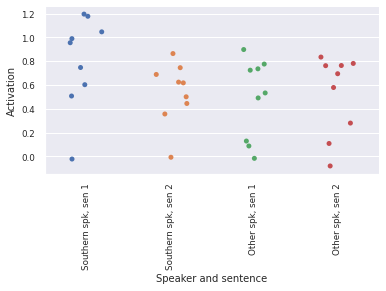

In [ ]:
import seaborn as sns
sns.set(font_scale = 0.8)

g = sns.stripplot('Speaker and sentence', 'Activations', data=Jitter, jitter=0.2)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
sns.despine()


g.set_xlabel("Speaker and sentence", fontsize = 10)
g.set_ylabel("Activation", fontsize = 10)

plt.subplots_adjust(bottom=0.4, top=.98)
plt.savefig('jitter-unit1.png', dpi=1200)

In [ ]:
# import seaborn as sns

# sns.set(style='ticks', context='talk')
# iris = sns.load_dataset('iris')

# sns.swarmplot('species', 'sepal_length', data=iris)
# sns.despine()

In [ ]:
# g = sns.stripplot('Speaker and sentence', 'Activations', data=Jitter, jitter=0.2)
# g.set_xticklabels(g.get_xticklabels(), rotation=90)
# sns.despine()


# g.set_xlabel("Speaker and sentence", fontsize = 20)
# g.set_ylabel("Activations", fontsize = 20)

In [ ]:
# sns.set(style='ticks', context='talk')

# sns.swarmplot('Speaker and sentence', 'Activations', data=Jitter)
# # g.set_xticklabels(g.get_xticklabels(), rotation=90)
# sns.despine()

selected spk: p225
Southern spk, sen 1 tensor(2.1866)
Southern spk, sen 2 tensor(2.2941)
selected spk: p230
Other spk, sen 1 tensor(1.2253)
Other spk, sen 2 tensor(1.7076)
selected spk: p228
Southern spk, sen 1 tensor(2.2158)
Southern spk, sen 2 tensor(2.2970)
selected spk: p233
Other spk, sen 1 tensor(1.2861)
Other spk, sen 2 tensor(1.2835)
selected spk: p229
Southern spk, sen 1 tensor(2.2349)
Southern spk, sen 2 tensor(1.1594)
selected spk: p234
Other spk, sen 1 tensor(1.3119)
Other spk, sen 2 tensor(0.4363)
selected spk: p231
Southern spk, sen 1 tensor(1.9730)
Southern spk, sen 2 tensor(0.7755)
selected spk: p237
Other spk, sen 1 tensor(1.5461)
Other spk, sen 2 tensor(1.1156)
selected spk: p232
Southern spk, sen 1 tensor(0.7513)
Southern spk, sen 2 tensor(0.7266)
selected spk: p238
Other spk, sen 1 tensor(1.3596)
Other spk, sen 2 tensor(0.6536)
selected spk: p268
Southern spk, sen 1 tensor(2.5796)
Southern spk, sen 2 tensor(1.5849)
selected spk: p273
Other spk, sen 1 tensor(1.4139)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


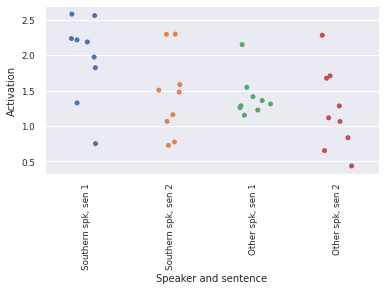

In [ ]:

from pyparsing import actions
s_african = {82, 86, 93, 99}
southern = {0, 3, 4, 6, 7, 14, 30, 31, 41}

speaker_sentence_list = []
activations_list = []


for index in southern:
  # chosen speaker saying normal thing
  spk = spks[index]
  spembs = xvectors[spk]
  print(f"selected spk: {spk}")
  x = "Please call Stella.  Ask her too."
  wav = text2speech(x, spembs=spembs)["wav"]
  temp = index_map(layer, 211622)
  act = text2speech.vocoder.retained_layer(layer)[0][temp[1]][temp[2]]
  print('Southern spk, sen 1', act)
  speaker_sentence_list.append('Southern spk, sen 1')
  activations_list.append(act.item())

  # chosen speaker saying other thing
  x = "Bring these things with her from the store."
  wav = text2speech(x, spembs=spembs)["wav"]
  temp = index_map(layer, 211622)
  act = text2speech.vocoder.retained_layer(layer)[0][temp[1]][temp[2]]
  print('Southern spk, sen 2', act)
  speaker_sentence_list.append('Southern spk, sen 2')
  activations_list.append(act.item())

  # choose speaker + 5 speakers on (so no repeats for southern)
  spk = spks[index+5]
  spembs = xvectors[spk]
  print(f"selected spk: {spk}")
  x = "Please call Stella.  Ask her too."
  wav = text2speech(x, spembs=spembs)["wav"]
  temp = index_map(layer, 211622)
  act = text2speech.vocoder.retained_layer(layer)[0][temp[1]][temp[2]]
  print('Other spk, sen 1', act)
  speaker_sentence_list.append('Other spk, sen 1')
  activations_list.append(act.item())

  # chosen speaker +5 saying other thing
  x = "Bring these things with her from the store."
  wav = text2speech(x, spembs=spembs)["wav"]
  temp = index_map(layer, 211622)
  act = text2speech.vocoder.retained_layer(layer)[0][temp[1]][temp[2]]
  print('Other spk, sen 2', act)
  speaker_sentence_list.append('Other spk, sen 2')
  activations_list.append(act.item())

# print(activations_list)
# print(speaker_sentence_list)


import pandas as pd
Jitter = {}

Jitter['Speaker and sentence'] = speaker_sentence_list
Jitter['Activations'] = activations_list

# print(Jitter['Speaker and sentence'])
frame = pd.DataFrame(Jitter)
print(frame)

g = sns.stripplot('Speaker and sentence', 'Activations', data=Jitter, jitter=0.2)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
sns.despine()


g.set_xlabel("Speaker and sentence", fontsize = 10)
g.set_ylabel("Activation", fontsize = 10)

plt.subplots_adjust(bottom=0.4, top=.98)
plt.savefig('jitter-unit2.png', dpi=1200)

selected spk: p225
Southern spk, sen 1 tensor(2.3913)
Southern spk, sen 2 tensor(1.9750)
selected spk: p230
Other spk, sen 1 tensor(1.8133)
Other spk, sen 2 tensor(1.6333)
selected spk: p228
Southern spk, sen 1 tensor(2.3652)
Southern spk, sen 2 tensor(2.0908)
selected spk: p233
Other spk, sen 1 tensor(1.3696)
Other spk, sen 2 tensor(1.2910)
selected spk: p229
Southern spk, sen 1 tensor(1.9652)
Southern spk, sen 2 tensor(1.6626)
selected spk: p234
Other spk, sen 1 tensor(1.6723)
Other spk, sen 2 tensor(0.5155)
selected spk: p231
Southern spk, sen 1 tensor(2.3827)
Southern spk, sen 2 tensor(1.1838)
selected spk: p237
Other spk, sen 1 tensor(1.2962)
Other spk, sen 2 tensor(1.5607)
selected spk: p232
Southern spk, sen 1 tensor(0.7236)
Southern spk, sen 2 tensor(0.7278)
selected spk: p238
Other spk, sen 1 tensor(1.4227)
Other spk, sen 2 tensor(0.4699)
selected spk: p268
Southern spk, sen 1 tensor(2.7376)
Southern spk, sen 2 tensor(2.5179)
selected spk: p273
Other spk, sen 1 tensor(1.1218)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


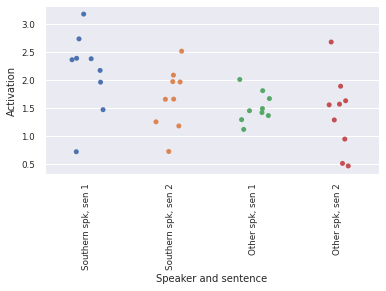

In [ ]:
from pyparsing import actions
s_african = {82, 86, 93, 99}
southern = {0, 3, 4, 6, 7, 14, 30, 31, 41}

speaker_sentence_list = []
activations_list = []


for index in southern:
  # chosen speaker saying normal thing
  spk = spks[index]
  spembs = xvectors[spk]
  print(f"selected spk: {spk}")
  x = "Please call Stella.  Ask her too."
  wav = text2speech(x, spembs=spembs)["wav"]
  temp = index_map(layer, 211614)
  act = text2speech.vocoder.retained_layer(layer)[0][temp[1]][temp[2]]
  print('Southern spk, sen 1', act)
  speaker_sentence_list.append('Southern spk, sen 1')
  activations_list.append(act.item())

  # chosen speaker saying other thing
  x = "Bring these things with her from the store."
  wav = text2speech(x, spembs=spembs)["wav"]
  temp = index_map(layer, 211614)
  act = text2speech.vocoder.retained_layer(layer)[0][temp[1]][temp[2]]
  print('Southern spk, sen 2', act)
  speaker_sentence_list.append('Southern spk, sen 2')
  activations_list.append(act.item())

  # choose speaker + 5 speakers on (so no repeats for southern)
  spk = spks[index+5]
  spembs = xvectors[spk]
  print(f"selected spk: {spk}")
  x = "Please call Stella.  Ask her too."
  wav = text2speech(x, spembs=spembs)["wav"]
  temp = index_map(layer, 211614)
  act = text2speech.vocoder.retained_layer(layer)[0][temp[1]][temp[2]]
  print('Other spk, sen 1', act)
  speaker_sentence_list.append('Other spk, sen 1')
  activations_list.append(act.item())

  # chosen speaker +5 saying other thing
  x = "Bring these things with her from the store."
  wav = text2speech(x, spembs=spembs)["wav"]
  temp = index_map(layer, 211614)
  act = text2speech.vocoder.retained_layer(layer)[0][temp[1]][temp[2]]
  print('Other spk, sen 2', act)
  speaker_sentence_list.append('Other spk, sen 2')
  activations_list.append(act.item())

# print(activations_list)
# print(speaker_sentence_list)


import pandas as pd
Jitter = {}

Jitter['Speaker and sentence'] = speaker_sentence_list
Jitter['Activations'] = activations_list

# print(Jitter['Speaker and sentence'])
frame = pd.DataFrame(Jitter)
print(frame)

g = sns.stripplot('Speaker and sentence', 'Activations', data=Jitter, jitter=0.2)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
sns.despine()


g.set_xlabel("Speaker and sentence", fontsize = 10)
g.set_ylabel("Activation", fontsize = 10)

plt.subplots_adjust(bottom=0.4, top=.98)
plt.savefig('jitter-unit3.png', dpi=1200)

In [ ]:
print(index_map(layer, 296261))
print(index_map(layer, 211622))
print(index_map(layer, 211614))

[0, 29, 6261]
[0, 21, 1622]
[0, 21, 1614]
